In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("combined_data.csv")
data.head()

,file_name,video_length,resolution,bit_depth,frame_rate,base_264_file_size,base_264_avg_rgb,base_264_bit_rate,base_264_psnr,base_264_ssim,...,veryslow_264_ratio,zeroletency_264_ratio,base_265_ratio,crf51_265_ratio,fastdecode_265_ratio,grain_265_ratio,slow_265_ratio,veryfast_265_ratio,veryslow_265_ratio,zerolatency_265_ratio
0,video10.mp4,27.243,"(960, 540)",8,25.00,3478.010742,"(144.83748842592593, 129.01155092592592, 113.0...",1037219,35.724668,0.989806,...,1.332667,0.793404,3.464880,40.644087,3.444207,2.066294,3.059804,3.730236,2.978314,2.109934
1,video8.mp4,12.679,"(1280, 576)",8,30.00,651.205078,"(133.2162570529514, 112.39920654296876, 108.08...",409404,28.891322,0.975133,...,1.190516,0.612920,2.196619,10.304552,2.229212,1.434295,1.999023,2.363258,2.014178,1.150675
2,video14.mp4,10.044,"(1024, 576)",8,29.97,1945.457031,"(105.95069037543402, 102.88011847601996, 106.8...",1449233,31.749508,0.977245,...,1.234398,1.032225,2.212361,10.647359,2.149387,1.698007,1.922629,2.481749,1.866269,1.860603
3,video1.mp4,24.200,"(2732, 848)",8,30.00,1790.656250,"(16.764064183402855, 16.852209315174452, 17.10...",542354,27.046755,0.889438,...,1.206502,0.594250,1.453452,6.115421,1.454495,0.741897,1.294232,1.541931,1.306607,0.615097
4,video11.mp4,181.034,"(1280, 630)",8,30.00,40273.584961,"(125.36892733134921, 129.16049851190476, 108.3...",1682641,33.290361,0.986530,...,1.163078,0.781387,2.094673,10.944809,2.026847,1.408180,1.947391,2.333427,1.921305,1.357426


In [7]:
data.info

<bound method DataFrame.info of       file_name  video_length   resolution  bit_depth  frame_rate   
0   video10.mp4        27.243   (960, 540)          8   25.000000  \
1    video8.mp4        12.679  (1280, 576)          8   30.000000   
2   video14.mp4        10.044  (1024, 576)          8   29.970000   
3    video1.mp4        24.200  (2732, 848)          8   30.000000   
4   video11.mp4       181.034  (1280, 630)          8   30.000000   
5    video5.mp4         9.814  (1280, 720)          8   29.970030   
6    video7.mp4         8.278  (1280, 720)          8   29.970030   
7   video12.mp4        35.765  (720, 1280)          8   29.666667   
8   video13.mp4        11.703  (576, 1024)          8   60.000000   
9   video15.mp4        10.048  (1280, 720)          8   25.000000   
10   video2.mp4       308.060   (640, 360)          8   25.000000   
11   video4.mp4         6.230  (1280, 720)          8   23.976024   
12   video3.mp4       117.967  (1364, 768)          8   30.000000   
13

### Comparisions to be made
1. Encoding time comparisions of all 264s - lineplot
2. Encoding time comparisions of all 265s - lineplot
3. PSNR comparisions of all 264s - lineplot
4. SSIM comparisions of all 265s - lineplot
5. filesize comparisions of all 264s - histogram
6. filesize comparisions of all 265s - histogram

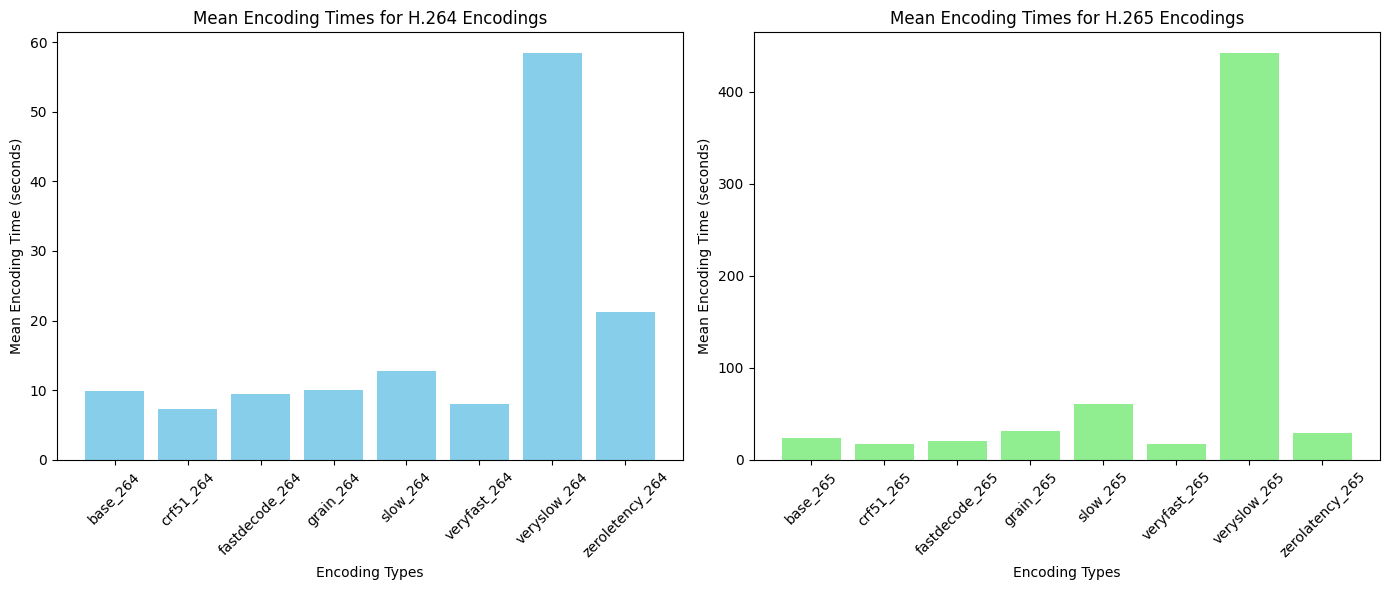

In [3]:
import matplotlib.pyplot as plt

# Extracting the relevant columns for 264 encodings
encoding_times_264 = [
    data['base_264_encoding_time'],
    data['crf51_264_encoding_time'],
    data['fastdecode_264_encoding_time'],
    data['grain_264_encoding_time'],
    data['slow_264_encoding_time'],
    data['veryfast_264_encoding_time'],
    data['veryslow_264_encoding_time'],
    data['zeroletency_264_encoding_time']
]

# Corresponding labels for the bar plot
labels_264 = ['base_264','crf51_264',  'fastdecode_264', 'grain_264', 
              'slow_264', 'veryfast_264', 'veryslow_264', 'zeroletency_264']

# Extracting the relevant columns for 265 encodings
encoding_times_265 = [
    data['base_265_encoding_time'],
    data['crf51_265_encoding_time'],
    data['fastdecode_265_encoding_time'],
    data['grain_265_encoding_time'],
    data['slow_265_encoding_time'],
    data['veryfast_265_encoding_time'],
    data['veryslow_265_encoding_time'],
    data['zerolatency_265_encoding_time']
]

# Corresponding labels for the bar plot
labels_265 = ['base_265', 'crf51_265', 'fastdecode_265', 'grain_265', 
              'slow_265', 'veryfast_265', 'veryslow_265', 'zerolatency_265']

# Creating side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting 264 encodings
axes[0].bar(labels_264, [times.mean() for times in encoding_times_264], color='skyblue')
axes[0].set_xlabel('Encoding Types')
axes[0].set_ylabel('Mean Encoding Time (seconds)')
axes[0].set_title('Mean Encoding Times for H.264 Encodings')
axes[0].tick_params(axis='x', rotation=45)

# Plotting 265 encodings
axes[1].bar(labels_265, [times.mean() for times in encoding_times_265], color='lightgreen')
axes[1].set_xlabel('Encoding Types')
axes[1].set_ylabel('Mean Encoding Time (seconds)')
axes[1].set_title('Mean Encoding Times for H.265 Encodings')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


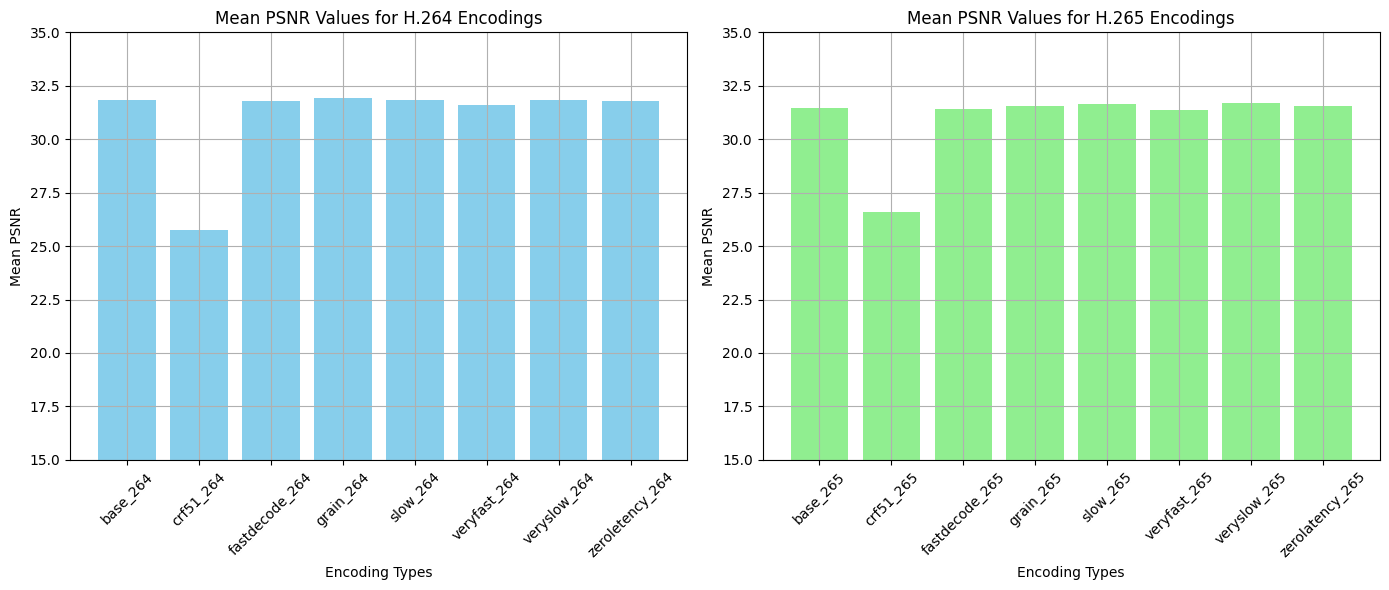

In [4]:
# Mean PSNR of each encoding presets in H264
psnr_264 = [
    data['base_264_psnr'],
    data['crf51_264_psnr'],
    data['fastdecode_264_psnr'],
    data['grain_264_psnr'],
    data['slow_264_psnr'],
    data['veryfast_264_psnr'],
    data['veryslow_264_psnr'],
    data['zeroletency_264_psnr']
]

# Mean PSNR of each encoding presets in H265
psnr_265 = [
    data['base_265_psnr'],
    data['crf51_265_psnr'],
    data['fastdecode_265_psnr'],
    data['grain_265_psnr'],
    data['slow_265_psnr'],
    data['veryfast_265_psnr'],
    data['veryslow_265_psnr'],
    data['zerolatency_265_psnr']
]

# Creating side-by-side subplots for mean PSNR values
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting mean PSNR values for 264 encodings
axes[0].bar(labels_264, [psnr.mean() for psnr in psnr_264], color='skyblue')
axes[0].set_xlabel('Encoding Types')
axes[0].set_ylabel('Mean PSNR')
axes[0].set_title('Mean PSNR Values for H.264 Encodings')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim([15, 35])
axes[0].grid(True)

# Plotting mean PSNR values for 265 encodings
axes[1].bar(labels_265, [psnr.mean() for psnr in psnr_265], color='lightgreen')
axes[1].set_xlabel('Encoding Types')
axes[1].set_ylabel('Mean PSNR')
axes[1].set_title('Mean PSNR Values for H.265 Encodings')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim([15, 35])
axes[1].grid(True)

plt.tight_layout()
plt.show()


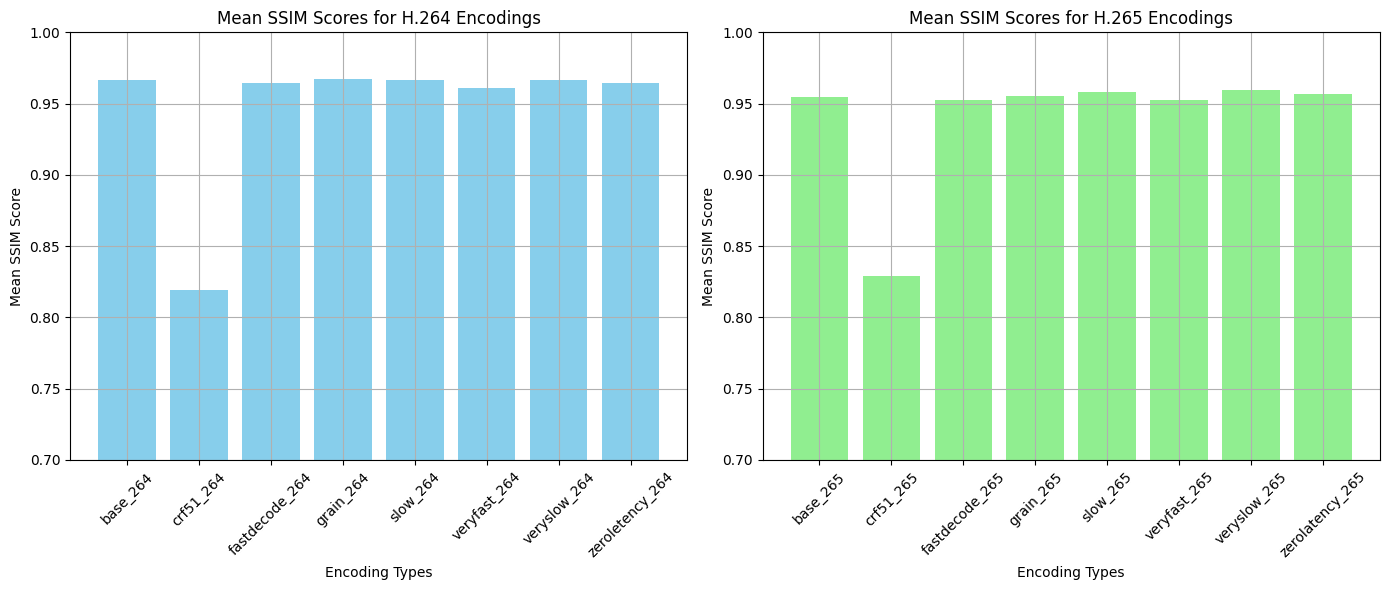

In [5]:
# Mean SSIM score of each encoding presets in H264
ssim_264 = [
    data['base_264_ssim'],
    data['crf51_264_ssim'],
    data['fastdecode_264_ssim'],
    data['grain_264_ssim'],
    data['slow_264_ssim'],
    data['veryfast_264_ssim'],
    data['veryslow_264_ssim'],
    data['zeroletency_264_ssim']
]

# Mean SSIM score of each encoding presets in H265
ssim_265 = [
    data['base_265_ssim'],
    data['crf51_265_ssim'],
    data['fastdecode_265_ssim'],
    data['grain_265_ssim'],
    data['slow_265_ssim'],
    data['veryfast_265_ssim'],
    data['veryslow_265_ssim'],
    data['zerolatency_265_ssim']
]

# Creating side-by-side subplots for mean SSIM scores
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting mean SSIM scores for 264 encodings
axes[0].bar(labels_264, [ssim.mean() for ssim in ssim_264], color='skyblue')
axes[0].set_xlabel('Encoding Types')
axes[0].set_ylabel('Mean SSIM Score')
axes[0].set_title('Mean SSIM Scores for H.264 Encodings')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim([0.7, 1])
axes[0].grid(True)

# Plotting mean SSIM scores for 265 encodings
axes[1].bar(labels_265, [ssim.mean() for ssim in ssim_265], color='lightgreen')
axes[1].set_xlabel('Encoding Types')
axes[1].set_ylabel('Mean SSIM Score')
axes[1].set_title('Mean SSIM Scores for H.265 Encodings')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim([0.7, 1])
axes[1].grid(True)

plt.tight_layout()
plt.show()


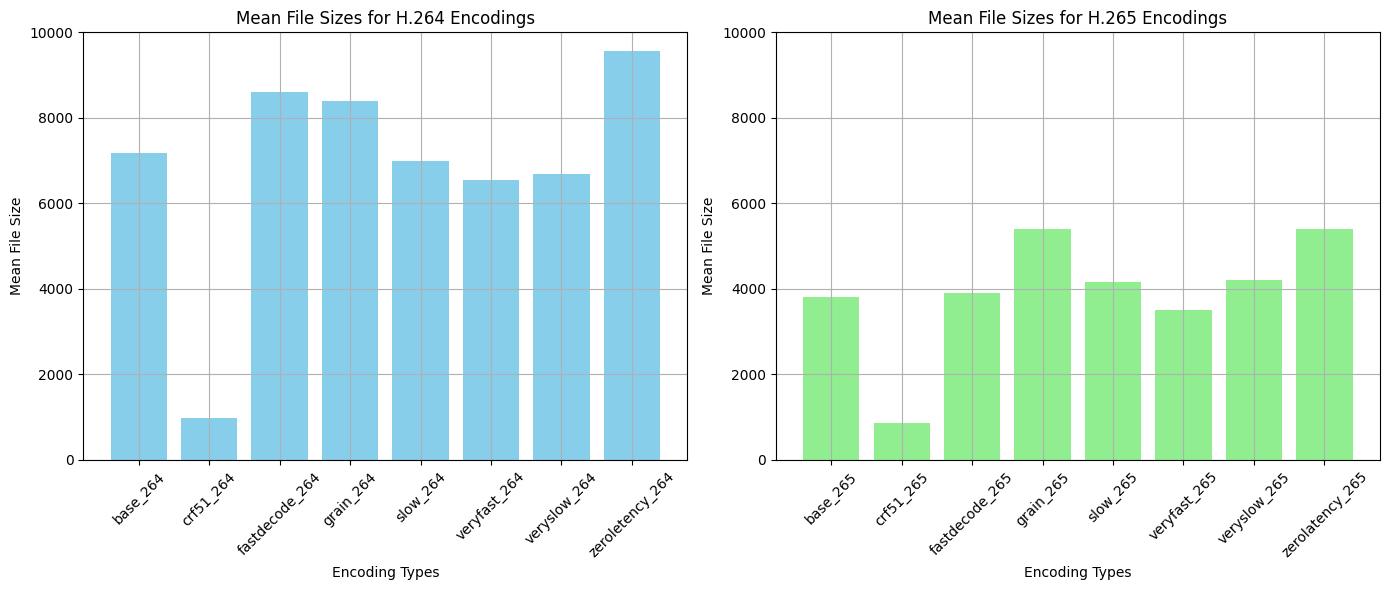

In [6]:
# Mean file size of each encoding presets in H264
file_size_264 = [
    data['base_264_file_size'],
    data['crf51_264_file_size'],
    data['fastdecode_264_file_size'],
    data['grain_264_file_size'],
    data['slow_264_file_size'],
    data['veryfast_264_file_size'],
    data['veryslow_264_file_size'],
    data['zeroletency_264_file_size']
]

# Mean file size of each encoding presets in H265
file_size_265 = [
    data['base_265_file_size'],
    data['crf51_265_file_size'],
    data['fastdecode_265_file_size'],
    data['grain_265_file_size'],
    data['slow_265_file_size'],
    data['veryfast_265_file_size'],
    data['veryslow_265_file_size'],
    data['zerolatency_265_file_size']
]

# Creating side-by-side subplots for mean file sizes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting mean file sizes for 264 encodings
axes[0].bar(labels_264, [size.mean() for size in file_size_264], color='skyblue')
axes[0].set_xlabel('Encoding Types')
axes[0].set_ylabel('Mean File Size')
axes[0].set_title('Mean File Sizes for H.264 Encodings')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim([0, 10000])
axes[0].grid(True)

# Plotting mean file sizes for 265 encodings
axes[1].bar(labels_265, [size.mean() for size in file_size_265], color='lightgreen')
axes[1].set_xlabel('Encoding Types')
axes[1].set_ylabel('Mean File Size')
axes[1].set_title('Mean File Sizes for H.265 Encodings')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim([0, 10000])
axes[1].grid(True)


plt.tight_layout()
plt.show()


In [7]:
data.columns

Index(['file_name', 'video_length', 'resolution', 'bit_depth', 'frame_rate',
       'base_264_file_size', 'base_264_avg_rgb', 'base_264_bit_rate',
       'base_264_psnr', 'base_264_ssim',
       ...
       'veryslow_264_ratio', 'zeroletency_264_ratio', 'base_265_ratio',
       'crf51_265_ratio', 'fastdecode_265_ratio', 'grain_265_ratio',
       'slow_265_ratio', 'veryfast_265_ratio', 'veryslow_265_ratio',
       'zerolatency_265_ratio'],
      dtype='object', length=118)

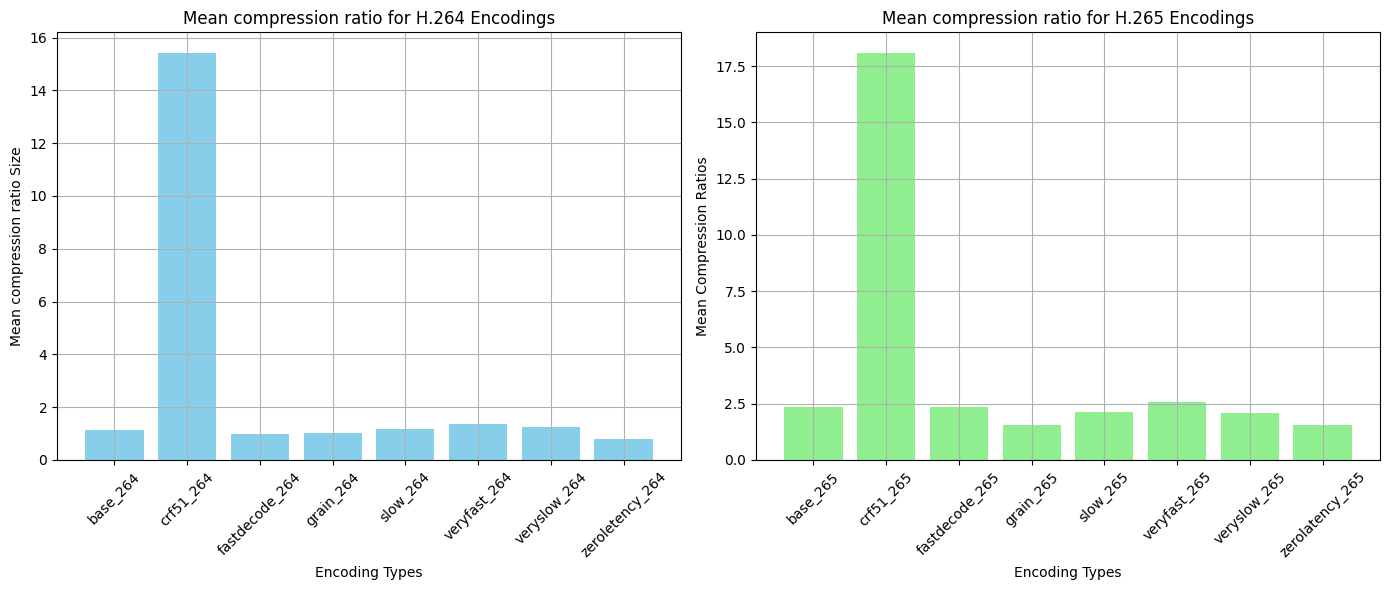

In [10]:
s